**Problem Statement**  

The primary objective of this project is to develop a machine learning model using the Keras API to predict loan repayment behavior based on historical data from the LendingClub dataset. LendingClub, a prominent peer-to-peer lending platform, provides detailed records of borrower profiles, loan details, and repayment outcomes.  

Given the "loan_status" column as the target variable, the model aims to classify borrowers as either likely to repay their loans or default (charge-off). Accurate predictions can assist in assessing the creditworthiness of potential customers, reducing financial risks, and optimizing lending strategies.  

The project emphasizes the following:  
- Performing feature engineering to preprocess the dataset and enhance model input.  
- Applying deep learning techniques to build a robust classification model.  
- Evaluating model performance using appropriate classification metrics (e.g., accuracy, precision, recall).  

This project will demonstrate how deep learning can provide actionable insights for financial risk assessment and decision-making in the lending domain.  

---

Step 1 :- import basic library and dataset .

In [3321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3322]:

data_description=pd.read_csv('../TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_info.csv')

In [3323]:
data_description

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [3324]:
df=pd.read_csv('../TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [3325]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


Step 2 :- let's analysis data

In [3327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [3328]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


Setp 3 :- Exploratory Data Analysis

OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data

<Axes: xlabel='loan_status', ylabel='count'>

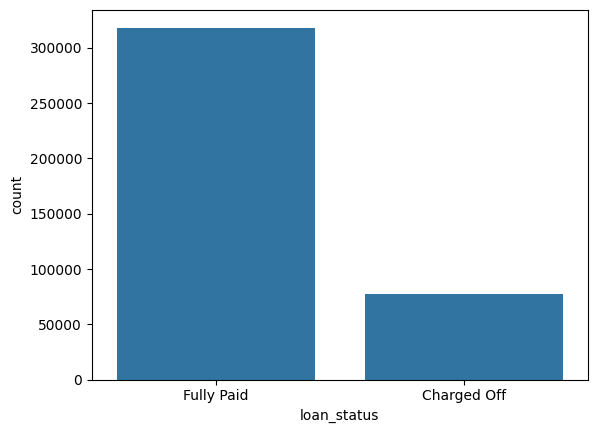

In [3330]:
sns.countplot(data=df,x='loan_status') #our lable is loan_status.

let's check how many amount to be given to how many clients .

<Axes: xlabel='loan_amnt', ylabel='Count'>

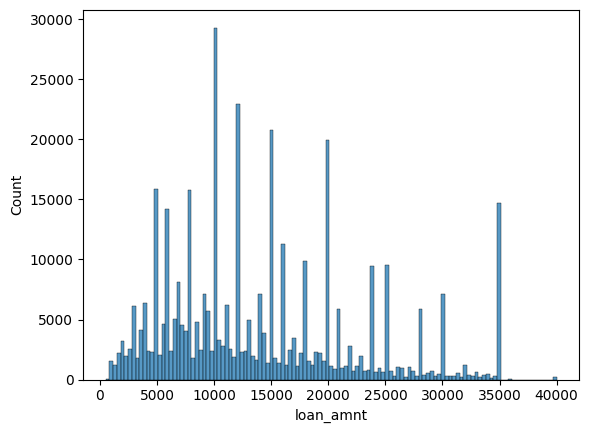

In [3332]:
sns.histplot(data=df,x='loan_amnt')

In [3333]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

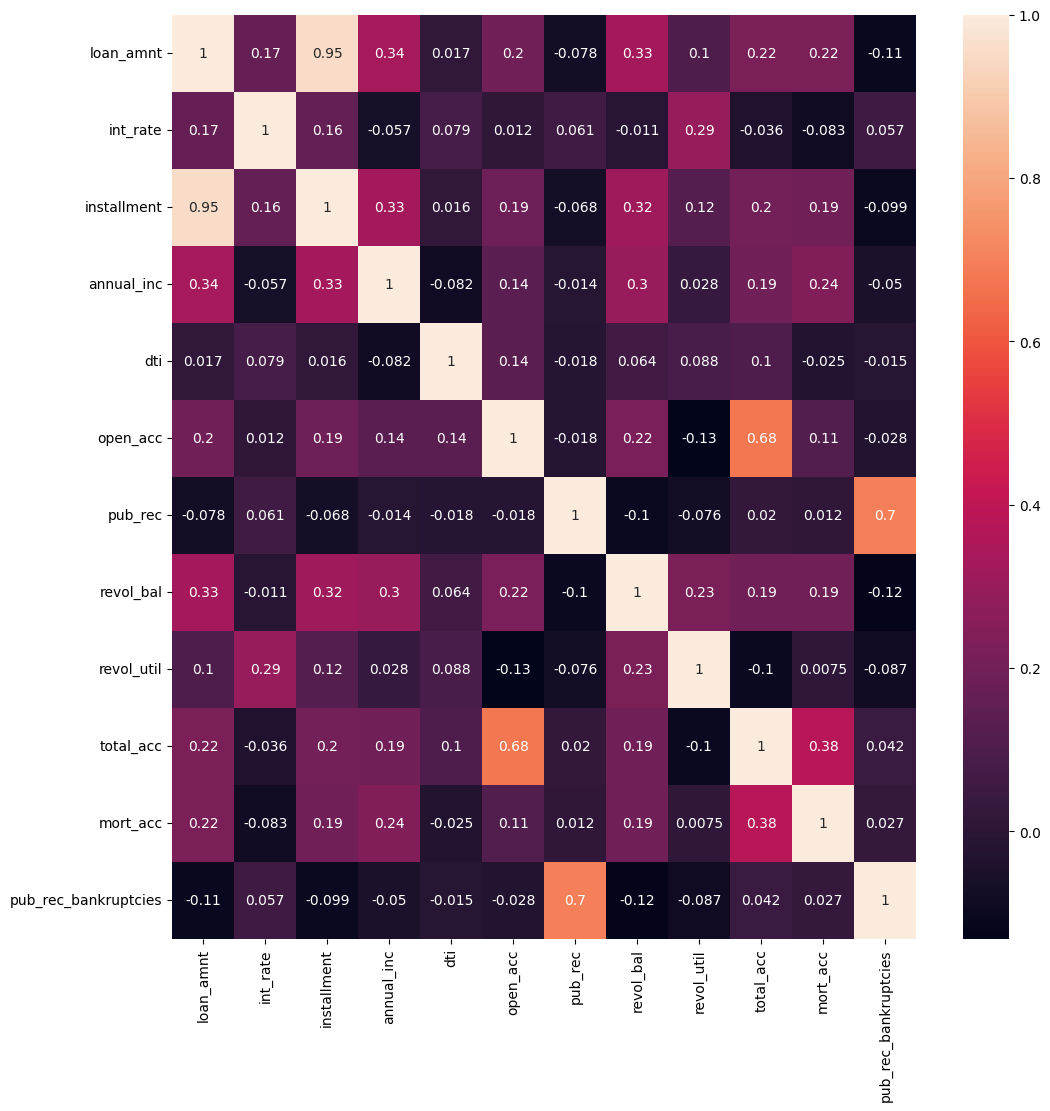

In [3334]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

from above chart , we can conclude the following co-relation :- Loan_amt with installment , total acc with open acc , pub_rec_bankruptcies with pub_rec.

let's check relation between installment Vs loan_amt ;- 0.95 by scatterplot 

<Axes: xlabel='installment', ylabel='loan_amnt'>

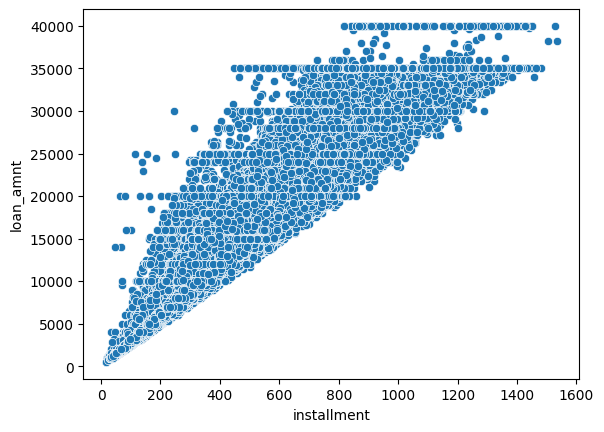

In [3337]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

we can easily see that there are linear relation between them and the installment gives same information as loan_amnt. so we not need to handle separatly to train our model.

In [3339]:
data_description.columns #let's check description of installment.

Index(['LoanStatNew', 'Description'], dtype='object')

In [3340]:
data_description[data_description['LoanStatNew']=='installment']['Description'].iloc[0]

'The monthly payment owed by the borrower if the loan originates.'

In [3341]:
data_description[data_description['LoanStatNew']=='loan_amnt']['Description'].iloc[0] #let's check loan amnt description.

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

2)Let's check the relation of loan_amnt with loan_status .through boxplot.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

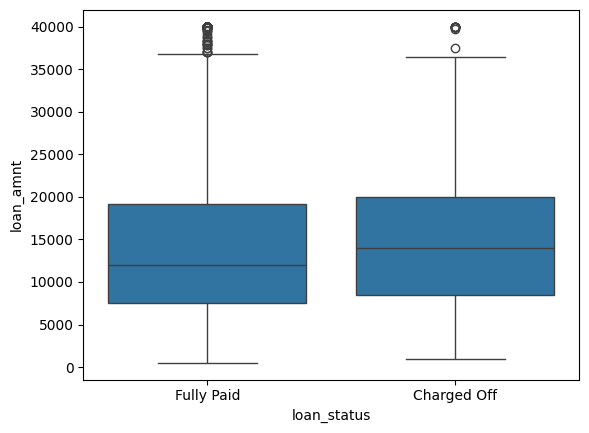

In [3343]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [3344]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [3345]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [3346]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<Axes: xlabel='grade', ylabel='count'>

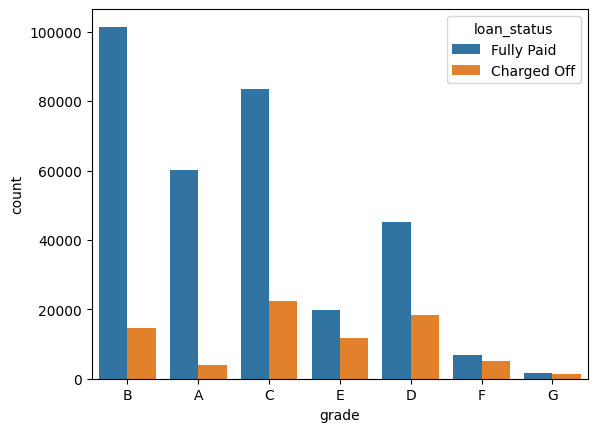

In [3347]:
sns.countplot(data=df,x='grade',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

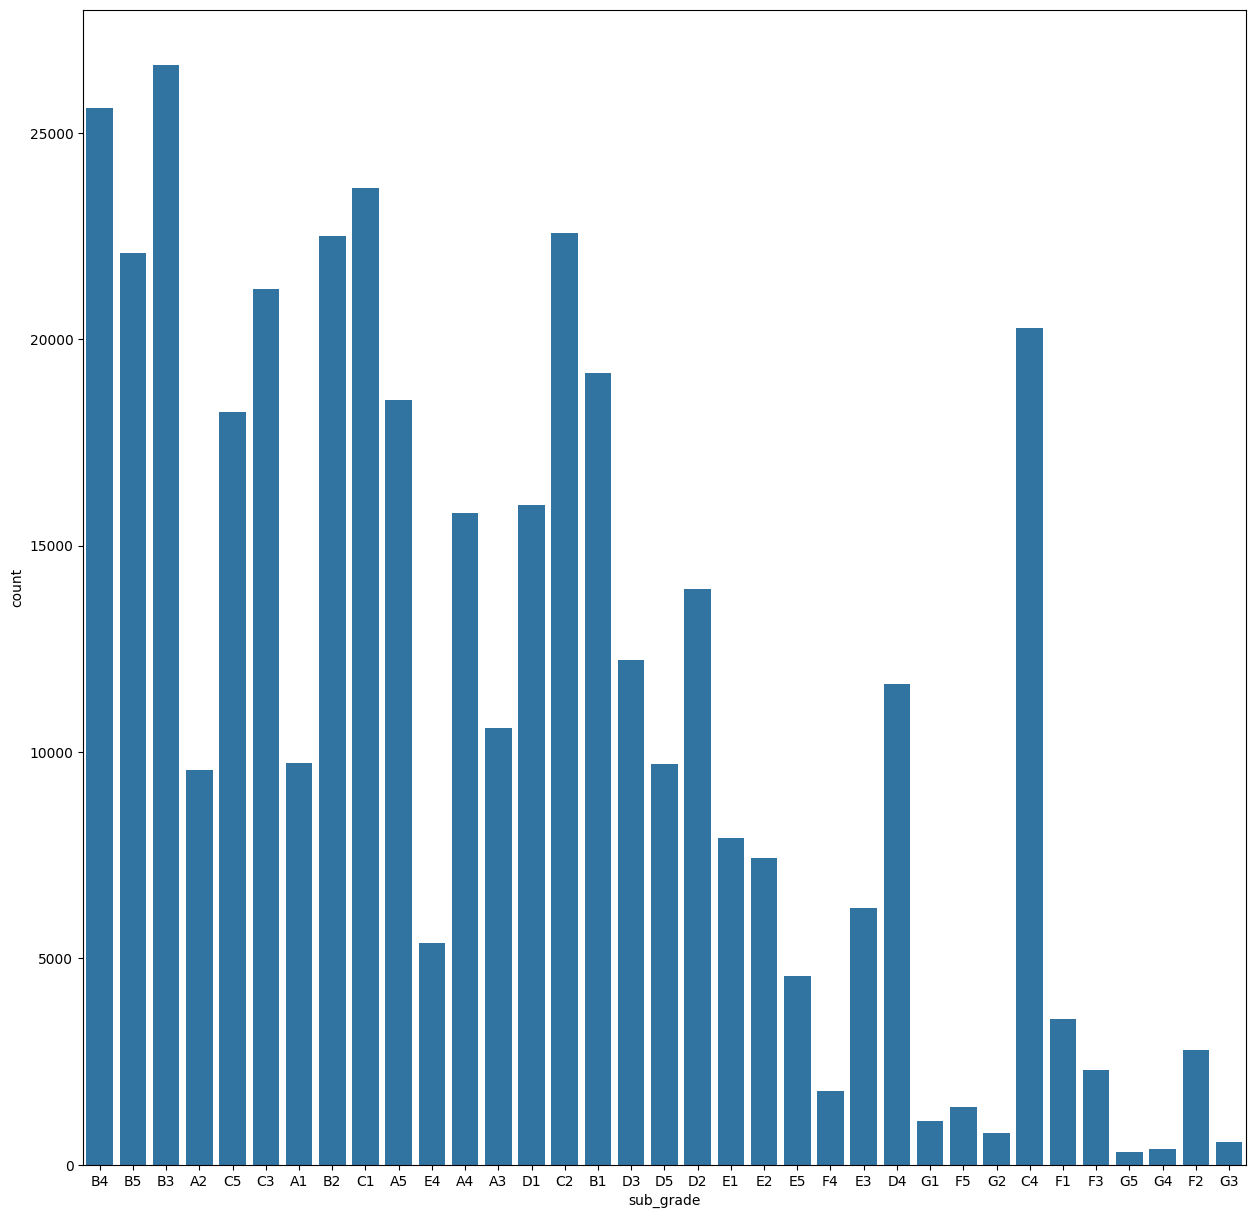

In [3348]:
plt.figure(figsize=(15,15))
sns.countplot(data=df,x='sub_grade')

<Axes: xlabel='sub_grade', ylabel='count'>

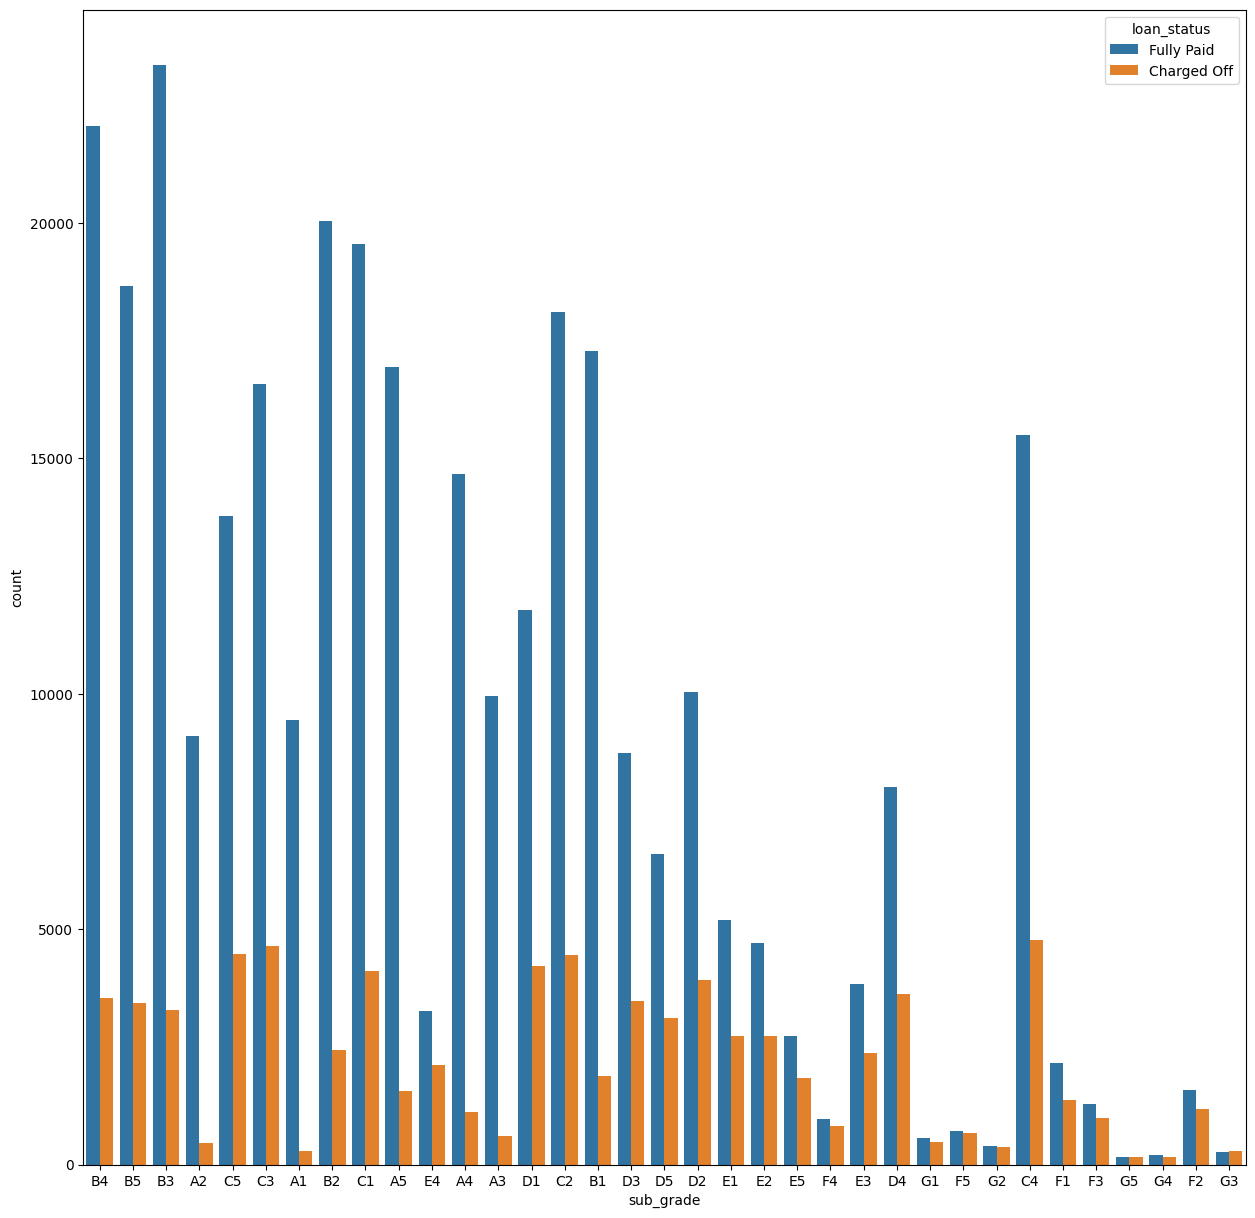

In [3349]:
plt.figure(figsize=(15,15))
sns.countplot(data=df,x='sub_grade',hue='loan_status')

Conclusion :- looks like F and G grade's people doesn't return loan. let's create analysis only these two grade.

In [3351]:
df['sub_grade'].isin(['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: sub_grade, Length: 396030, dtype: bool

In [3352]:
df[df['sub_grade'].isin(['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])]
grade_df=df[df['sub_grade'].isin(['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])]

<Axes: xlabel='sub_grade', ylabel='count'>

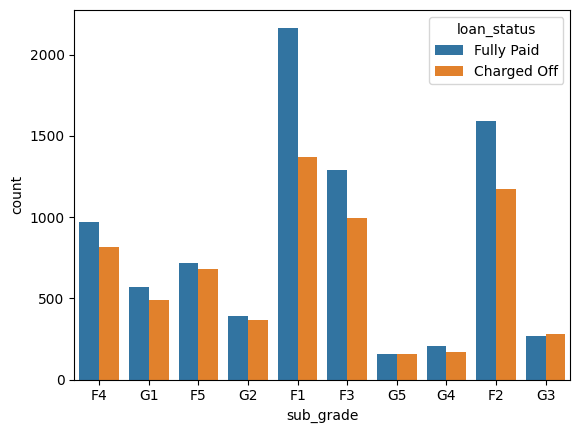

In [3353]:
sns.countplot(data=grade_df,x='sub_grade',hue='loan_status')

Let's create a new column who should represent loan_repaid , fully Paid=1 and charged off=0.

In [3355]:
df['loan_repaid']=pd.get_dummies(data=df['loan_status'],drop_first=True)

In [3356]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",True
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",True
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",True
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",True
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",True
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",True
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",True
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",True


In [3357]:
df.corr(numeric_only=True)['loan_repaid'][:-1] 

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Name: loan_repaid, dtype: float64

<Axes: >

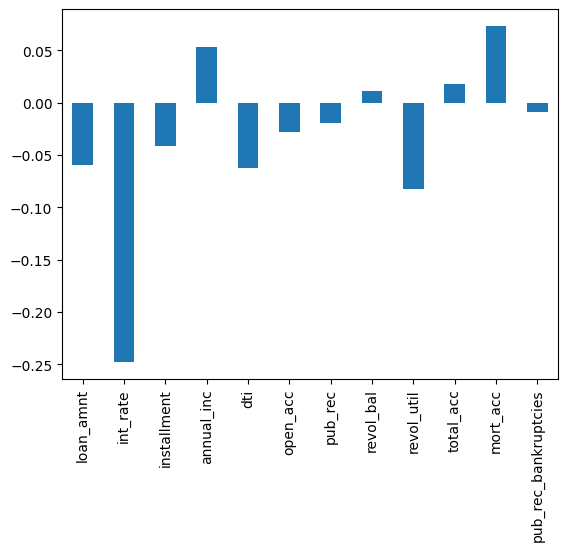

In [3358]:
df.corr(numeric_only=True)['loan_repaid'][:-1].plot(kind='bar')

# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [3361]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3362]:
len(df)

396030

Let's check how many null values in each column ....

In [3364]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

let's check total percentage of missing data w.r.t data frame.

In [3366]:
percentage_missing_data=(df.isnull().sum()/len(df))*100
print(percentage_missing_data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


Let's examine emp_title and emp_length to see whether it will be okay to drop them. By Print out their feature information 

In [3368]:
print(data_description[data_description['LoanStatNew']=='emp_title']['Description'].iloc[0])

The job title supplied by the Borrower when applying for the loan.*


In [3369]:
print(data_description[data_description['LoanStatNew']=='emp_length']['Description'].iloc[0])

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [3370]:
print(len(df['emp_title'].unique())) #total unique job title 

173106


In [3371]:
df.groupby('emp_title')['emp_title'].count().sort_values(ascending=False)

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
 Captain                           1
 Cash management Team leader       1
 Cashier                           1
 CenturyLink                       1
 A Bell Pest Services              1
Name: emp_title, Length: 173105, dtype: int64

Because emp_title have so much unique values so it is not advisable to convert it into dummy variables.So let's drop this column.

In [3373]:
df.drop('emp_title',inplace=True,axis=1)

So emp_title complete now focus on emp_length.

In [3375]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

<Axes: xlabel='emp_length', ylabel='count'>

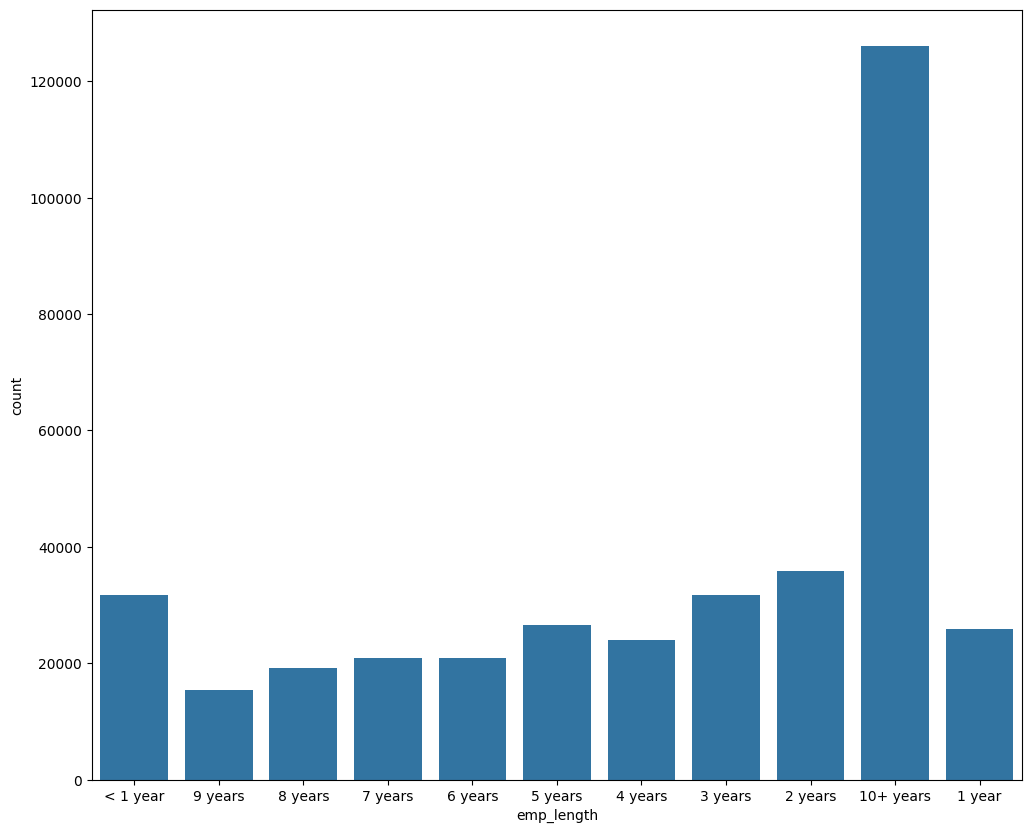

In [3376]:
plt.figure(figsize=(12,10))
sns.countplot(data=df.sort_values(by='emp_length',ascending=False),x='emp_length')

<Axes: xlabel='emp_length', ylabel='count'>

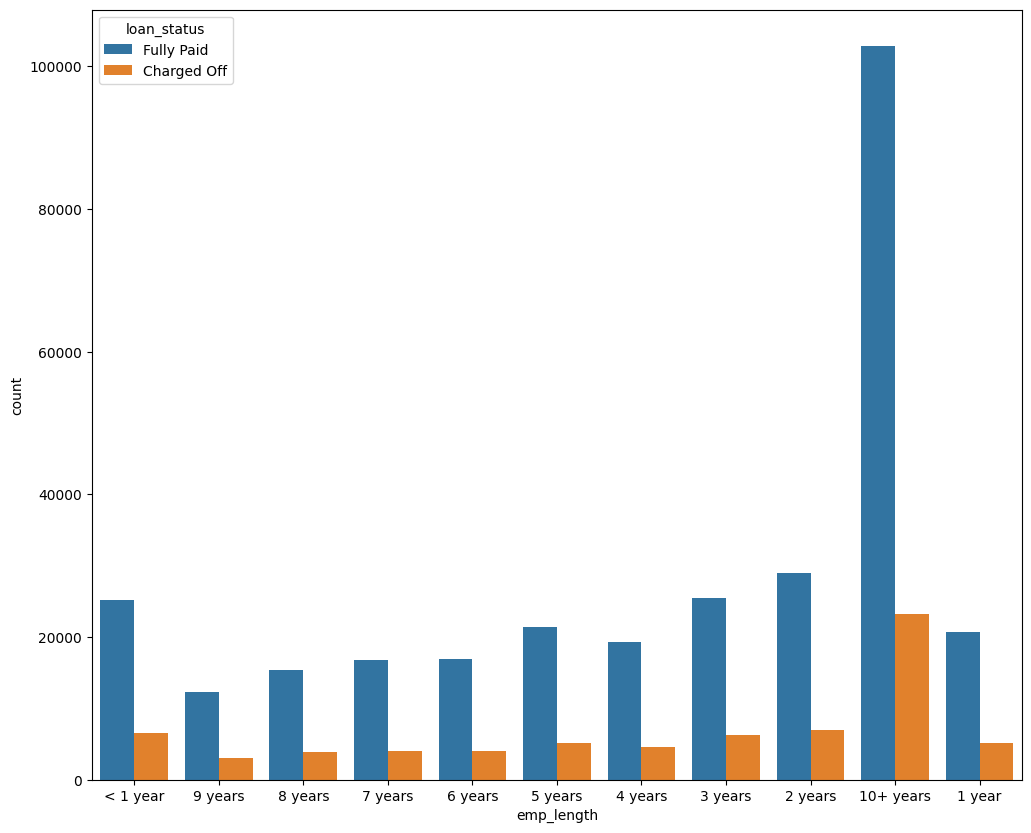

In [3377]:
plt.figure(figsize=(12,10))
sns.countplot(data=df.sort_values(by='emp_length',ascending=False),x='emp_length',hue='loan_status')

from the chart we can't get insight i.e. how it's effect our goal.so we need to see how many % of people charged off w.r.t to total people on base of each emp_length categories.

In [3379]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']


In [3380]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [3381]:
emp_per_co=emp_co/emp_fp

In [3382]:
emp_per_co

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

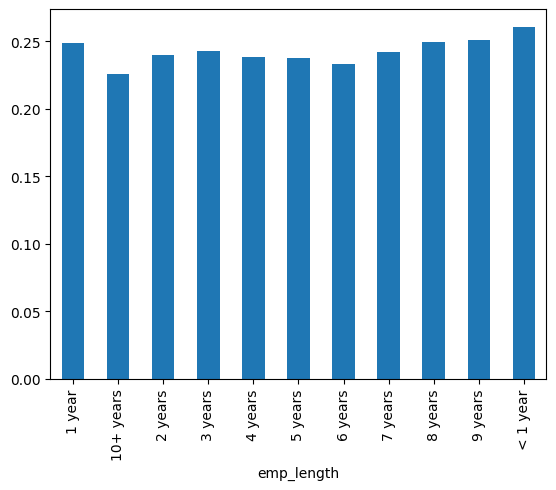

In [3383]:
emp_per_co.plot(kind='bar')

so as we see here that Charge off rates are extremely similar across all emp_length. so we can drop the emp_len column.

In [3385]:
df.drop('emp_length',axis=1,inplace=True)

Revisit the DataFrame to see what feature columns still have missing data

In [3387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [3388]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [3389]:
data_description[data_description['LoanStatNew']=='title']['Description']

14    The loan title provided by the borrower
Name: Description, dtype: object

In [3390]:
data_description[data_description['LoanStatNew']=='purpose']['Description'].iloc[0]

'A category provided by the borrower for the loan request. '

In [3391]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [3392]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**Note :- Looks both column gives same kind of information.
So we can drop out the title column because it is not needed.

In [3394]:
df.drop('title',axis=1,inplace=True)

Let's start to focus on mort_acc 

In [3396]:
data_description[data_description['LoanStatNew']=='mort_acc']['Description'].iloc[0]

'Number of mortgage accounts.'

In [3397]:
df.groupby(by='mort_acc')['mort_acc'].count()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
21.0         4
22.0         7
23.0         2
24.0        10
25.0         4
26.0         2
27.0         3
28.0         1
30.0         1
31.0         2
32.0         2
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc

In [3399]:
df.corr(numeric_only=True)['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below

In [3401]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [3403]:
mean_mort_acc=df.groupby('total_acc')['mort_acc'].mean()
mean_mort_acc.index

Index([  2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,  10.0,  11.0,
       ...
       111.0, 115.0, 116.0, 117.0, 118.0, 124.0, 129.0, 135.0, 150.0, 151.0],
      dtype='float64', name='total_acc', length=118)

In [3404]:
def fill_mort_acc(total_account, mort_account):
    # Check if the mortgage account is missing
    if pd.isnull(mort_account):  
        # Iterate over the mean_mort_acc index
        for index in mean_mort_acc.index:
            if index == total_account:
                return mean_mort_acc[index]
    else:
        # If not null, return the existing mortgage account value
        return mort_account


In [3405]:
df['mort_acc']=df.apply(
    lambda row : fill_mort_acc(row['total_acc'],row['mort_acc']),axis=1
)

In [3406]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Congratulation !!!!!! we done successfully . Party Time , Hurrey !!

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().

In [3409]:
df.dropna(inplace=True)

In [3410]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**List all the columns that are currently non-numeric

In [3412]:
df.select_dtypes(exclude=['number'])

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address,loan_repaid
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690",True
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",True
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",True
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813",True
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723",True
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA...",True
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466",True
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",True


In [3413]:
df.select_dtypes(exclude=['number']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address', 'loan_repaid'],
      dtype='object')

In [3414]:
non_numeric_columns=df.select_dtypes(exclude=['number']).columns

In [3415]:
data_description[data_description['LoanStatNew']=='term']['Description'].iloc[0]

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [3416]:
data_description[data_description['LoanStatNew']=='grade']['Description'].iloc[0]

'LC assigned loan grade'

In [3417]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

1) let's convert term column into 36 or 60 numeric value by apply or map method.

In [3419]:
df['term']=df['term'].apply(lambda x: int(x.split()[0]))

In [3420]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

2) ### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [3422]:
df.drop('grade',axis=1,inplace=True)

Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [3424]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [3425]:
data=pd.get_dummies(data=df['sub_grade'],drop_first=True)

In [3426]:
data

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3427]:
df=pd.concat([df,data],axis=1)

In [3428]:
df.drop('sub_grade',axis=1,inplace=True)

In [3429]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [3430]:
df.select_dtypes(exclude=['number']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
we Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [3432]:
data_ver=pd.get_dummies(df['verification_status'],drop_first=True)

In [3433]:
data_app=pd.get_dummies(df['application_type'],drop_first=True)

In [3434]:
data_int=pd.get_dummies(df['initial_list_status'],drop_first=True)

In [3435]:
data_pur=pd.get_dummies(df['purpose'],drop_first=True)

In [3436]:
df.drop('purpose',axis=1,inplace=True)

In [3437]:
df.drop('initial_list_status',axis=1,inplace=True)

In [3438]:
df.drop('application_type',axis=1,inplace=True)

In [3439]:
df.drop('verification_status',axis=1,inplace=True)

In [3440]:
df=pd.concat([df,data_app,data_int,data_pur,data_ver],axis=1)

In [3441]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'INDIVIDUAL',
       'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Source Verified', 'Verified'],
      dtype='object')

In [3442]:
df.groupby('home_ownership')['home_ownership'].count().sort_values()

home_ownership
ANY              3
NONE            29
OTHER          110
OWN          37660
RENT        159395
MORTGAGE    198022
Name: home_ownership, dtype: int64

Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [3444]:
def modifyHomeOwnership(home):
    if home=='ANY' or home=='NONE' :
        return 'OTHER';
    else :
        return home;

In [3445]:
df['home_ownership']=df['home_ownership'].apply(lambda x: modifyHomeOwnership(x))

In [3446]:
df['home_ownership'].unique()


array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [3447]:
rent=pd.get_dummies(df['home_ownership'],drop_first=True)

In [3448]:
df=pd.concat([df,rent],axis=1)

In [3449]:
df.drop('home_ownership',axis=1,inplace=True)

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [3451]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [3452]:
df['zip_code']=df['address'].apply(lambda x: x.split()[-1])

In [3453]:
df['zip_code']
df.drop('address',axis=1,inplace=True)

### issue_d 
 This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [3455]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [3457]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [3458]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))

In [3459]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [3460]:
df.drop('earliest_cr_line',axis=1,inplace=True)

## Section 3 :-Train Test Split

In [3462]:
from sklearn.model_selection import train_test_split

In [3463]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'INDIVIDUAL',
       'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'Source Verified', 'Verified', 'OTHER', 'OWN', 'RENT', 'zip_code',
       'earliest_cr_year'],
      dtype='object')

In [3464]:
df.drop('loan_status',axis=1,inplace=True)

In [3465]:
X=df.drop('loan_repaid',axis=1)

In [3466]:
y=df['loan_repaid']

In [3467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if we are not using GPU.

----
----

In [3469]:
df=df.sample(frac=0.1,random_state=101)

In [3470]:
print(len(df))

39522


In [3471]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. we don't want data leakge from the test set so we only fit on the X_train data.**

In [3473]:
from sklearn.preprocessing import MinMaxScaler

In [3474]:
scaler=MinMaxScaler()

In [3638]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\govinda.tak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [3477]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation

**Build a sequential model to will be trained on the data. we have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [3479]:
model = Sequential()

In [3480]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [3481]:
from tensorflow.keras.callbacks import EarlyStopping

In [3482]:
Earlystop=EarlyStopping(monitor='val_loss',verbose=1,mode='min',patience=25)

In [3640]:
model.fit(X_train,y_train,batch_size=256,verbose=1,epochs=200,validation_data=(X_test,y_test),callbacks=[Earlystop])

Epoch 1/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3158 - val_loss: 676321.9375
Epoch 2/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3117 - val_loss: 670870.2500
Epoch 3/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3067 - val_loss: 689909.9375
Epoch 4/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036 - val_loss: 666901.5000
Epoch 5/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2999 - val_loss: 692923.3750
Epoch 6/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3024 - val_loss: 720368.7500
Epoch 7/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2981 - val_loss: 721645.5000
Epoch 8/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2930 - val_loss: 740590.5000
Epoch 9/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2817 - val_loss: 741824.3125
Epoch 10/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2875 - val_loss: 744125.5625
Epoch 11/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2881 - val_loss

# Section 3: Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

<Axes: >

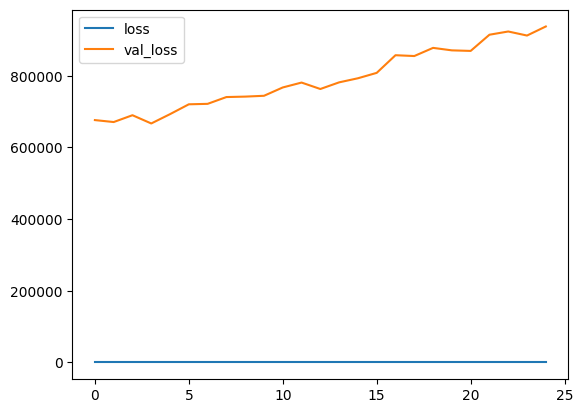

In [3642]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

<Axes: >

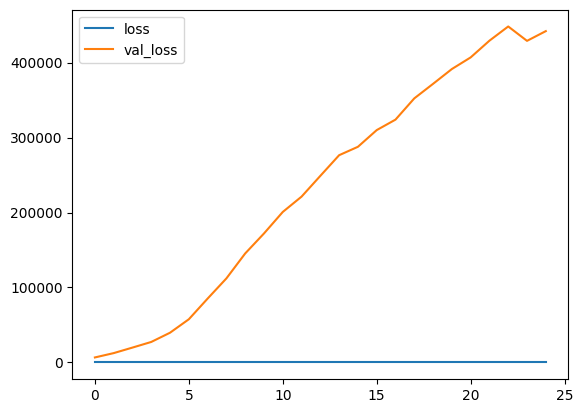

In [3486]:
model_loss[['loss','val_loss']].plot()

In [3487]:
model.history.history

{'loss': [0.49046844244003296,
  0.43497127294540405,
  0.4207219183444977,
  0.41330763697624207,
  0.4075867831707001,
  0.39748138189315796,
  0.39166274666786194,
  0.3861004710197449,
  0.37984684109687805,
  0.376955509185791,
  0.37277838587760925,
  0.37044212222099304,
  0.3666943609714508,
  0.36522960662841797,
  0.3651086986064911,
  0.3638477027416229,
  0.3615662753582001,
  0.35944437980651855,
  0.3605654537677765,
  0.36001694202423096,
  0.3582237958908081,
  0.3566785752773285,
  0.3552318513393402,
  0.3548031747341156,
  0.3547686040401459],
 'val_loss': [6703.73779296875,
  12488.9638671875,
  19868.01171875,
  27374.197265625,
  39705.484375,
  57633.7890625,
  85209.6953125,
  112146.1171875,
  145403.484375,
  172061.296875,
  200745.71875,
  221199.515625,
  248901.515625,
  276445.3125,
  287643.46875,
  309914.0625,
  323888.96875,
  352216.5,
  371627.96875,
  391354.5625,
  406862.28125,
  429172.5,
  448113.28125,
  428933.5625,
  441915.78125]}

In [3488]:
y_pred=model.predict(X_test,verbose=1)

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


In [3489]:
from sklearn.metrics import classification_report, confusion_matrix

In [3490]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.33      0.55      0.41      1570
        True       0.87      0.72      0.79      6335

    accuracy                           0.69      7905
   macro avg       0.60      0.63      0.60      7905
weighted avg       0.76      0.69      0.71      7905



In [3491]:
print(confusion_matrix(y_test,y_pred))

[[ 857  713]
 [1762 4573]]


**TASK: Given the customer below, would you offer this person a loan?**

import random
random.seed(101)
random_num=random.randint(0,len(df))
new_customer=df.drop('loan_repaid',axis=1).iloc[random_num]
new_customer

model.predict(new_customer.values.reshape(1,70))

In [3495]:
import random
import numpy as np

random.seed(101)

# Generate a random row index
random_num = random.randint(0, len(df) - 1)

# Select the random customer and drop the target column
new_customer = df.drop('loan_repaid', axis=1).iloc[random_num]

# Ensure the input shape is correct and convert to float32
new_customer_array = new_customer.values.reshape(1, -1).astype('float32')

# Make a prediction
prediction = model.predict(new_customer_array)

# Output the prediction
print(f"Prediction for new customer: {prediction[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for new customer: [0.]


###Don't give loan to this customer .